In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [16]:
human = pd.read_table('C:/Users/Adithya Arunganesh/Desktop/Projects/DNA Sequencing/human_data.txt')
dog = pd.read_table('C:/Users/Adithya Arunganesh/Desktop/Projects/DNA Sequencing/dog_data.txt')
chimp = pd.read_table('C:/Users/Adithya Arunganesh/Desktop/Projects/DNA Sequencing/chimp_data.txt')

In [17]:
human.head()
dog.head()
chimp.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [19]:
human['class'].unique()
#There are 7 classes of gene

array([4, 3, 5, 2, 6, 0, 1], dtype=int64)

Treating DNA sequence as a "language", otherwise known as k-mer counting
A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

Here I am using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.

In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible k-mer sequence. There are specialized tools for this, but the Python natural language processing tools make it supe easy.

Here is a function that can be used to convert any sequence (string) to overlapping k-mer words:

Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [20]:
#Function to convert sequence string into k-mer words, default size is 6 known as hexamer

def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [21]:
#We broke the sequence in length of 6. 

convert the training set sequence into short overlapping k-mers of length 6 and we apply the getKmer function to other species

In [22]:
human['words']=human.apply(lambda x: getKmers(x['sequence']), axis=1)
human=human.drop('sequence', axis=1)

In [23]:
chimp['words']=chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp=chimp.drop('sequence', axis=1)

In [24]:
dog['words']=dog.apply(lambda x: getKmers(x['sequence']), axis=1)
dog=dog.drop('sequence', axis=1)

In [28]:
human.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."



Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels. Let's do that now

In [29]:
human_text=list(human['words'])

for item in range(len(human_text)):
    human_text[item]=' '.join(human_text[item])
    
    
y_human=human.iloc[:, 0].values


In [30]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

Apply same process for Chimp and Dog

In [31]:
chimp_text=list(chimp['words'])

for item in range(len(chimp_text)):
    chimp_text[item]=' '.join(chimp_text[item])
    
    
y_chimp=chimp.iloc[:, 0].values


In [32]:
dog_text=list(dog['words'])

for item in range(len(dog_text)):
    dog_text[item]=' '.join(dog_text[item])
    
    
y_dog=dog.iloc[:, 0].values


Apply Bag of Words using CountVectorizer using NLP


The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [33]:
# Create Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing

from sklearn.feature_extraction.text import CountVectorizer


In [35]:
cv = CountVectorizer(ngram_range=(4,4))

X_human = cv.fit_transform(human_text)
X_chimp = cv.transform(chimp_text)
X_dog = cv.transform(dog_text)

In [36]:
print(X_human.shape) #for human we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer(length 6) counts.
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


If we have a look at class balance we can see we have relatively balanced dataset.

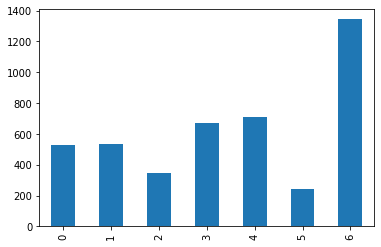

In [37]:
human['class'].value_counts().sort_index().plot.bar()

Split the data into training and testing set

In [38]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X_human, y_human, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [44]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [46]:
multi=MultinomialNB(alpha=0.1)
multi.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [47]:
y_pred=multi.predict(X_test)

Model Performance

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [50]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
